In [1]:
import os,sys
#folder = '/content/gdrive/My Drive/dataset/case'
folder1 = '/home/rai/다운로드/emotifymusic/classical'

for filename in os.listdir(folder1):
       infilename = os.path.join(folder1,filename)
       if not os.path.isfile(infilename): continue
       oldbase = os.path.splitext(filename)
       newname = infilename.replace('.tmp', '.mp3')
       output = os.rename(infilename, newname)

In [6]:
import os
import argparse

from pydub import AudioSegment

formats_to_convert = ['.mp3']

for (dirpath, dirnames, filenames) in os.walk("/home/rai/다운로드/emotifymusic/classical"):
    for filename in filenames:
        if filename.endswith(tuple(formats_to_convert)):

            filepath = dirpath + '/' + filename
            (path, file_extension) = os.path.splitext(filepath)
            file_extension_final = file_extension.replace('.', '')
            try:
                track = AudioSegment.from_file(filepath,
                        file_extension_final)
                wav_filename = filename.replace(file_extension_final, 'wav')
                wav_path = dirpath + '/' + wav_filename
                print('CONVERTING: ' + str(filepath))
                file_handle = track.export(wav_path, format='wav')
                os.remove(filepath)
            except:
                print("ERROR CONVERTING " + str(filepath))

CONVERTING: /home/rai/다운로드/emotifymusic/classical/30.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/40.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/72.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/66.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/65.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/61.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/93.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/52.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/92.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/57.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/62.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/27.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/58.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/5.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/71.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/35.mp3
CONVERTING: /home/rai/다운로드/emotifymusic/classical/38.mp3
CONVERTING: /home/rai/다운로드/emoti

Wav length: 60.0294375, Mel_S shape:(1025, 5991)


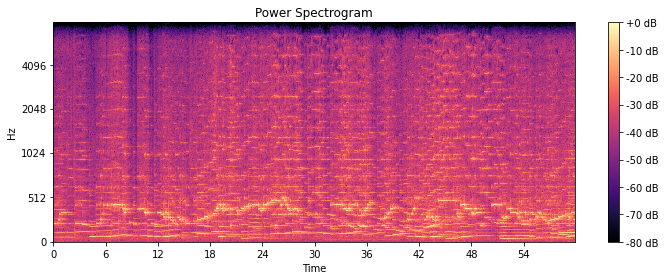

In [8]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

frame_length = 0.032
frame_stride = 0.010

# y, sr = librosa.load(librosa.util.example_audio_file())

def STFT_S(wav_file):
    # STFT
    # sr: sampling radio default - 22050
    y, sr = librosa.load(wav_file, sr=16000)
    
    input_nfft = int(round(sr*frame_length))    
    input_stride = int(round(sr*frame_stride))

    S = np.abs(librosa.stft(y, center=False, hop_length=input_stride))
    
    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))
    
    #Mel-Spectrogram plot
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Power Spectrogram')
    plt.tight_layout()
    plt.show()
    
   
    return S
  
man_original_data = '/home/rai/다운로드/emotifymusic/classical/1.wav'
#Mel-Spectrogram 
mel_spec = STFT_S(man_original_data)


Wav length: 60.0294375, Mel_S shape:(1025, 5991)


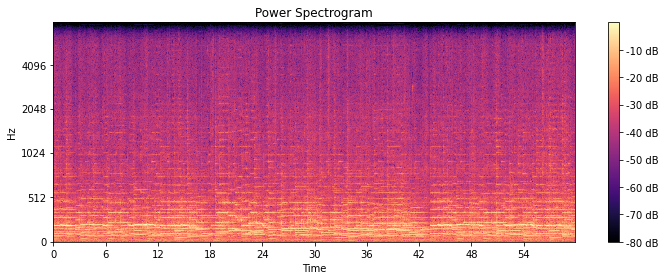

In [9]:
man_original_data = '/home/rai/다운로드/emotifymusic/classical/2.wav'
#Mel-Spectrogram 
mel_spec = STFT_S(man_original_data)

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

#load_path ="/home/rai/다운로드/emotifymusic/classical/mel"
#save_path = f'{load_path.split(".")[0]}.png'

frame_length = 0.032
frame_stride = 0.010

def Mel_S(wav_file):
    # mel-spectrogram
    # sr: sampling radio default - 22050
    y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))    
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))

    #Mel-Spectrogram plot
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    #plt.savefig(save_path, bbox_inches=None, pad_inches=0, dpi=100)
    plt.show()
   
    return S

Wav length: 60.0294375, Mel_S shape:(40, 6003)


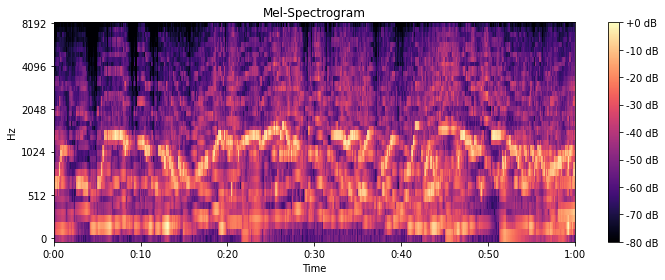

array([[0.00000000e+00, 4.58559923e-28, 5.52515977e-10, ...,
        6.71277347e-04, 3.17206373e-04, 1.84312474e-03],
       [0.00000000e+00, 6.48959284e-28, 5.91589755e-09, ...,
        2.04356741e-02, 8.54796823e-03, 1.18764834e-02],
       [0.00000000e+00, 8.43200537e-28, 2.57755026e-08, ...,
        1.06155336e-01, 2.61541680e-02, 9.01654288e-02],
       ...,
       [0.00000000e+00, 2.65884975e-22, 1.47505258e-10, ...,
        7.95197411e-06, 1.14204404e-05, 1.76066169e-04],
       [0.00000000e+00, 6.56185861e-21, 5.78104266e-11, ...,
        4.71029261e-06, 9.39821257e-06, 1.24449682e-04],
       [0.00000000e+00, 1.80665018e-20, 1.03118339e-11, ...,
        1.91829440e-06, 7.68056054e-07, 3.30151706e-05]], dtype=float32)

In [4]:
man_original_data = '/home/rai/다운로드/emotifymusic/classical/1.wav'
#Mel-Spectrogram 
mel_spec = Mel_S(man_original_data)
# Log convert
# log_S = librosa.logamplitude(mel_spec, ref_power=np.max)
mel_spec